# PCA :

## PCA from Scratch

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#importing MNIST data set (digit recognisation)
data = pd.read_csv(r"D:\Applied AI\Data Sets\MNIST\train.csv")

In [4]:
data.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data #dataset

#seperating the labels from pixel values
label = data['label'] 
pixel_values = data.drop('label', axis = 1)

In [6]:
#shape of data-set
print(pixel_values.shape)
print(label.shape)

(42000, 784)
(42000,)


We have 42,000 observations.

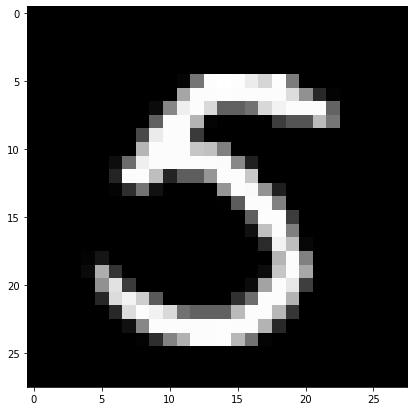

[5]


In [74]:
#display a number 
plt.figure(figsize = (7,7))
ind = 2568

grid_data = pixel_values.iloc[ind].to_numpy().reshape(28,28) # reshape from 1d -> 2d
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.savefig('dataset.png')
plt.show()

print(label[ind])

## 2D Visualization using PCA:

In [8]:
#Standardization of data
from sklearn.preprocessing import StandardScaler
std_data = StandardScaler().fit_transform(pixel_values)

In [9]:
#finding the co-variance matrix 

cov_matrix = np.matmul(std_data.T, std_data)
print ( "The shape of variance matrix = ", cov_matrix.shape)   #shape of covariance matrix is dxd


The shape of variance matrix =  (784, 784)


In [12]:
#Let's find the top 2 largest eigen-values and their corresponding eigen-vectors
#for projecting the data ppints into 2-dimentional space

from scipy.linalg import eigh

# the parameter 'eigvals' is defined (low value to heigh value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783) eigenvalues.
values, vectors = eigh(cov_matrix, eigvals = (782, 783))

print("Shape of eigen vectors = ",vectors.shape)
# converting the eigen vectors into (2,d) shape for easyness of further computations
vectors = vectors.T

print("Updated shape of eigen vectors = ",vectors.shape)
# here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
# here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

Shape of eigen vectors =  (784, 2)
Updated shape of eigen vectors =  (2, 784)


In [34]:
#finding the projection of each point on the new axis(vectors)
new_data_points = np.matmul(std_data, vectors.T)
print("Shape of new_data_points is: {} x {} = {}".format(std_data.shape, vectors.T.shape, new_data_points.shape))

Shape of new_data_points is: (42000, 784) x (784, 2) = (42000, 2)


In [35]:
#let's add labels to the new_data_points
label = label.reshape(42000, 1)
new_data_points = np.hstack((new_data_points, label))
new_data_points

array([[-5.2264454 , -5.14047772,  1.        ],
       [ 6.03299601, 19.29233234,  0.        ],
       [-1.70581328, -7.64450341,  1.        ],
       ...,
       [ 7.07627667,  0.49539137,  7.        ],
       [-4.34451279,  2.30724011,  6.        ],
       [ 1.55912058, -4.80767022,  9.        ]])

In [39]:
#creating a pandas dataframe
two_d_data = pd.DataFrame(data = new_data_points, columns = ("point1", "point2", "label"))

#changing the data type of label
two_d_data['label'] = two_d_data['label'].astype(int)

two_d_data

,point1,point2,label
0,-5.226445,-5.140478,1
1,6.032996,19.292332,0
2,-1.705813,-7.644503,1
3,5.836139,-0.474207,4
4,6.024818,26.559574,0
...,...,...,...
41995,-1.350366,13.678849,0
41996,-1.187360,-8.869582,1
41997,7.076277,0.495391,7
41998,-4.344513,2.307240,6


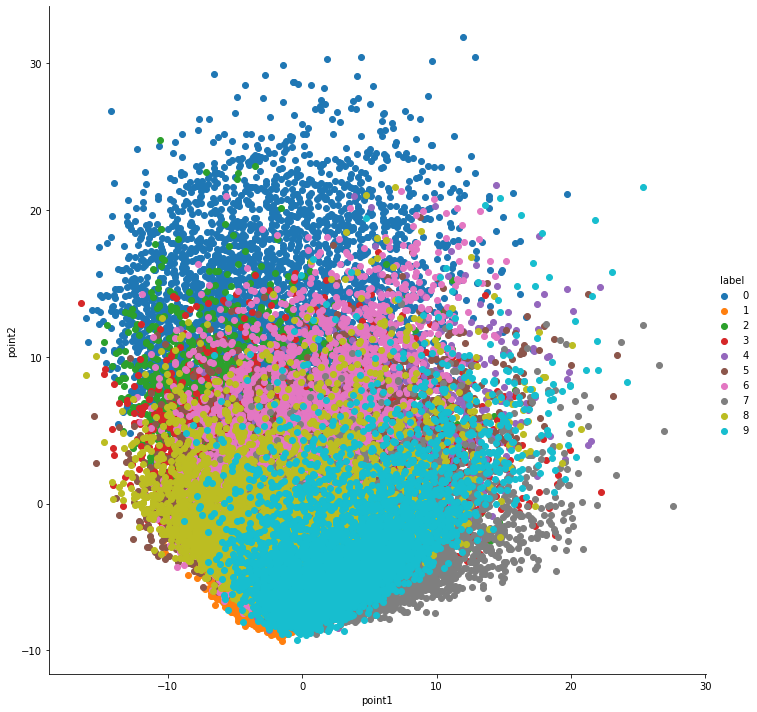

In [53]:
#Let's plot the data points
sns.FacetGrid(two_d_data, hue = 'label', size = 10).map(plt.scatter, 'point1', 'point2').add_legend()
plt.show()

## PCA using Scikit Learn

In [54]:
#Initialising a pca object
from sklearn import decomposition
pca = decomposition.PCA()

In [76]:
#confuring the parameter
pca.n_components = 2
pca_data = pca.fit_transform(pixel_values)

C:\Users\Swastik\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


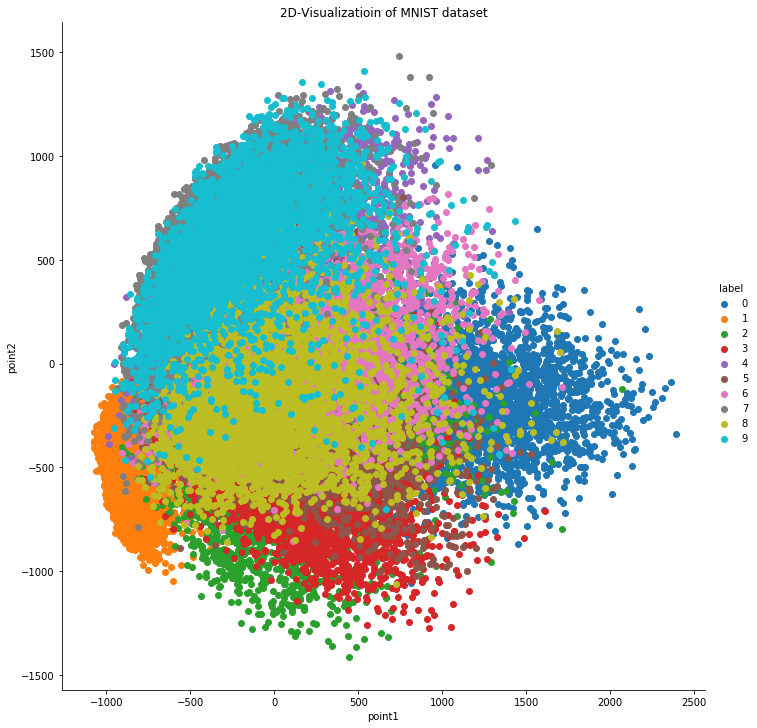

In [77]:
#let's add labels to the new_data_points
label = label.reshape(42000, 1)
new_data_points = np.hstack((pca_data, label))
new_data_points   #dim = 42000*3

#creating a pandas dataframe
two_d_data = pd.DataFrame(data = new_data_points, columns = ("point1", "point2", "label"))

#changing the data type of label
two_d_data['label'] = two_d_data['label'].astype(int)

two_d_data

# #Let's plot the data points
sns.FacetGrid(two_d_data, hue = 'label', size = 10).map(plt.scatter, 'point1', 'point2').add_legend()
plt.title('2D-Visualizatioin of MNIST dataset')
plt.savefig('2D-Visualization.png')
plt.show()

In [69]:
print(pca.explained_variance_)   #corresponding eigen values
print(pca.explained_variance_ratio_)  #corresponding eigen value ratios with all eigen values corresponding to all dimentional component
print(np.sum(pca.explained_variance_ratio_)*100, '%')  #percentage of information we have retained

[334780.59148856 245885.06504494]
[0.09748938 0.07160266]
16.909203961633402 %


Here we have reduced the dimention to 2, but with 2 component we have only retained around 17% of information only. Again we can't classify the digit from the above visualization. __So PCA is for Dimensionality Reduction, Not for Visualization.__

Let's check out how many components going to retain 90% and 95% of Information:

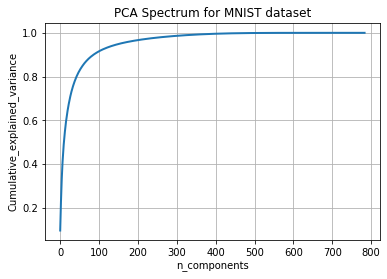

In [73]:
pca.n_components = 784
pca_data = pca.fit_transform(pixel_values)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.title('PCA Spectrum for MNIST dataset')
plt.savefig('PCA Spectrum.png')
plt.show()
# plt.savefig('PCA Spectrum.png')

<b>Around 100 components are retaining 90% of information <br>
Around 200 components are retaining 95% of information.</b>

In [72]:
plt.savefig('PCA Spectrum.png')

<Figure size 432x288 with 0 Axes>